# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 577


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kourou
Processing Record 2 of Set 1 | hithadhoo
Processing Record 3 of Set 1 | santa ana
Processing Record 4 of Set 1 | stanley
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | dakhla
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | ancud
Processing Record 12 of Set 1 | badger
Processing Record 13 of Set 1 | klyuchi
Processing Record 14 of Set 1 | margaret river
Processing Record 15 of Set 1 | puerto baquerizo moreno
Processing Record 16 of Set 1 | wanning
Processing Record 17 of Set 1 | isangel
Processing Record 18 of Set 1 | st. john's
Processing Record 19 of Set 1 | xianju
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | mstsislaw
Processing Record 22 of Set 1 | carnarvon
Processing Recor

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kourou,5.1552,-52.6478,26.28,85,90,2.88,GF,1729482864
1,hithadhoo,-0.6000,73.0833,28.25,72,7,4.60,MV,1729482865
2,santa ana,33.7456,-117.8678,22.51,34,0,2.06,US,1729482866
3,stanley,54.8680,-1.6985,12.01,79,54,12.35,GB,1729482868
4,bethel,41.3712,-73.4140,12.19,72,0,0.45,US,1729482749


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kourou,5.1552,-52.6478,26.28,85,90,2.88,GF,1729482864
1,hithadhoo,-0.6000,73.0833,28.25,72,7,4.60,MV,1729482865
2,santa ana,33.7456,-117.8678,22.51,34,0,2.06,US,1729482866
3,stanley,54.8680,-1.6985,12.01,79,54,12.35,GB,1729482868
4,bethel,41.3712,-73.4140,12.19,72,0,0.45,US,1729482749


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

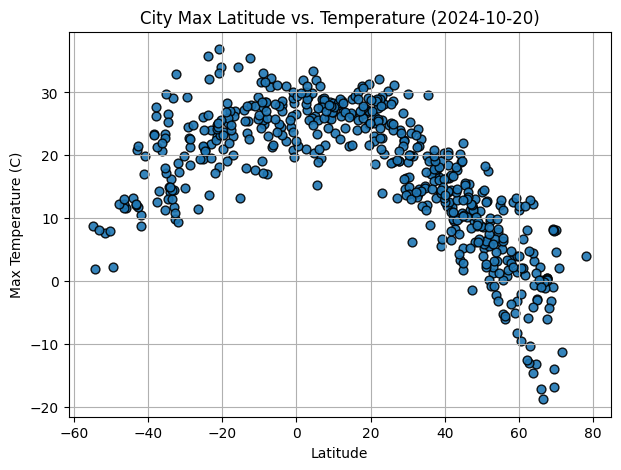

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.figure(figsize=(7, 5))
plt.scatter(x_values, y_values, alpha=0.9, edgecolors='black', s=40)

# Incorporate the other graph properties

plt.title('City Max Latitude vs. Temperature (2024-10-20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

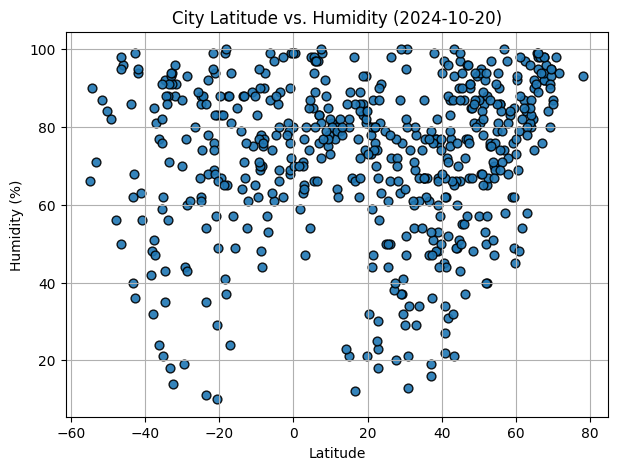

In [9]:
# Build the scatter plots for latitude vs. humidity

x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.figure(figsize=(7, 5))
plt.scatter(x_values, y_values, alpha=0.9, edgecolors='black', s=40)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2024-10-20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

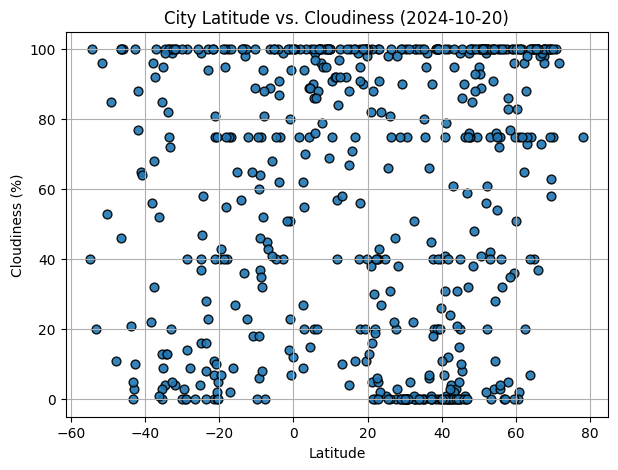

In [10]:
# Build the scatter plots for latitude vs. cloudiness

x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.figure(figsize=(7, 5))
plt.scatter(x_values, y_values, alpha=0.9, edgecolors='black', s=40)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2024-10-20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

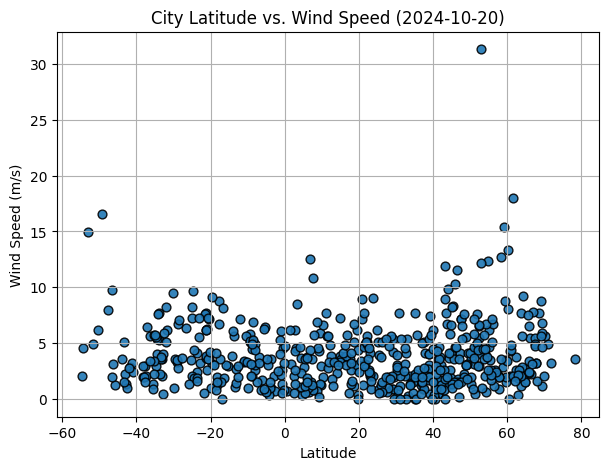

In [11]:
# Build the scatter plots for latitude vs. wind speed

x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.figure(figsize=(7, 5))
plt.scatter(x_values, y_values, alpha=0.9, edgecolors='black', s=40)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2024-10-20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [49]:
def linear_regres_plot(x_values, y_values, x_label, y_label, text_position=(2, 7)):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
       
    fig1, ax1 = plt.subplots(figsize=(6,5))
    plt.scatter(x_values, y_values, linewidth=1, marker="o", alpha=0.9)
    plt.plot(x_values,regress_values,"r-")
    
    plt.title(f"{x_label} vs {y_label}",fontsize = 12)
    plt.xlabel(x_label,fontsize=10)
    plt.ylabel(y_label,fontsize=10)
    
    plt.annotate(line_eq, text_position, fontsize=14, color="red")
    
    print(f"The r^2-value is: {rvalue**2}")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kourou,5.1552,-52.6478,26.28,85,90,2.88,GF,1729482864
2,santa ana,33.7456,-117.8678,22.51,34,0,2.06,US,1729482866
3,stanley,54.8680,-1.6985,12.01,79,54,12.35,GB,1729482868
4,bethel,41.3712,-73.4140,12.19,72,0,0.45,US,1729482749
7,ribeira grande,38.5167,-28.7000,16.54,77,100,2.68,PT,1729482872


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hithadhoo,-0.6000,73.0833,28.25,72,7,4.60,MV,1729482865
5,adamstown,-25.0660,-130.1015,19.37,62,16,7.27,PN,1729482870
6,ushuaia,-54.8000,-68.3000,8.81,66,40,2.06,AR,1729482375
9,puerto natales,-51.7236,-72.4875,7.57,87,96,4.94,CL,1729482874
10,ancud,-41.8697,-73.8203,10.48,94,77,2.90,CL,1729482875


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7577917321943326


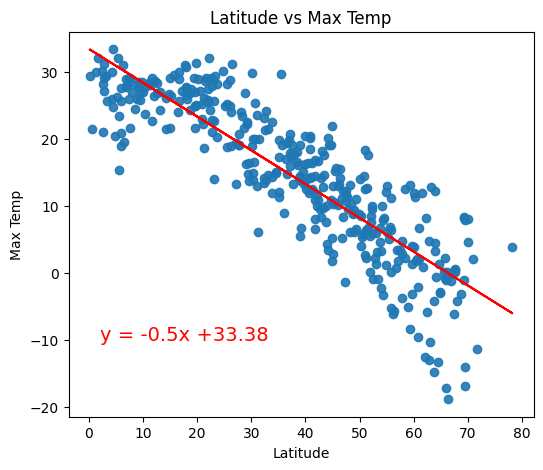

In [50]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

linear_regres_plot(x_values, y_values, "Latitude", "Max Temp", (2,-10))

plt.show()

The r^2-value is: 0.41460632735296526


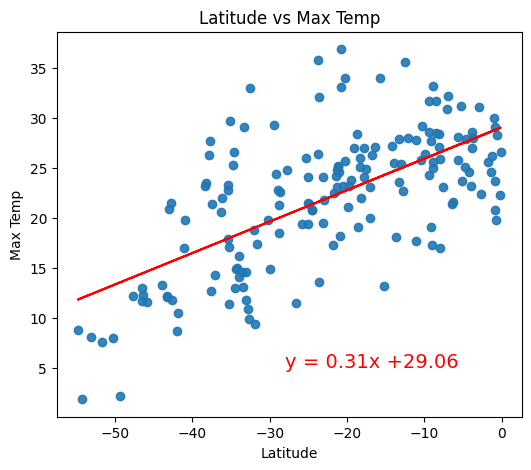

In [31]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

linear_regres_plot(x_values, y_values, "Latitude", "Max Temp", (-28,5))

plt.show()

**Discussion about the linear relationship:* From the regression lines in both Northern and Southern plots, we can observe a strong relationship between the Temperature degree and Latitude: The less the latitude is (the more we approach the equator), the hotter the weather gets.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.026103536347747463


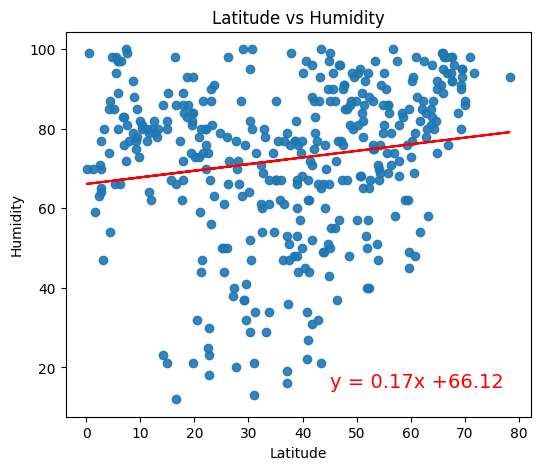

In [52]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

linear_regres_plot(x_values, y_values, "Latitude", "Humidity", (45,15))

plt.show()

The r^2-value is: 0.01431366509788815


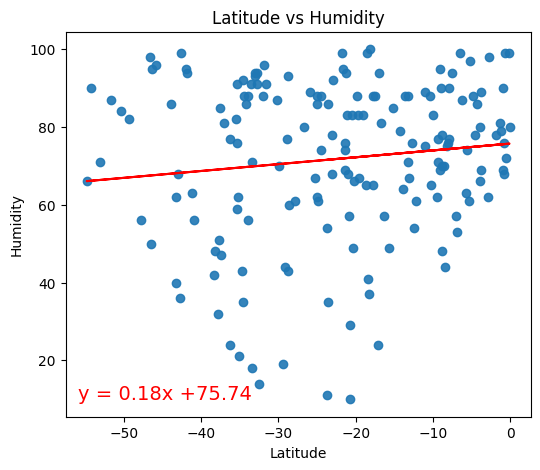

In [53]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

linear_regres_plot(x_values, y_values, "Latitude", "Humidity", (-56,10))

plt.show()

**Discussion about the linear relationship:** No relationship is abserved between the latitude and the Humidity, as in both plots above, the humidity is randomely scattered, regardless of the latitude values.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.0014959455529212867


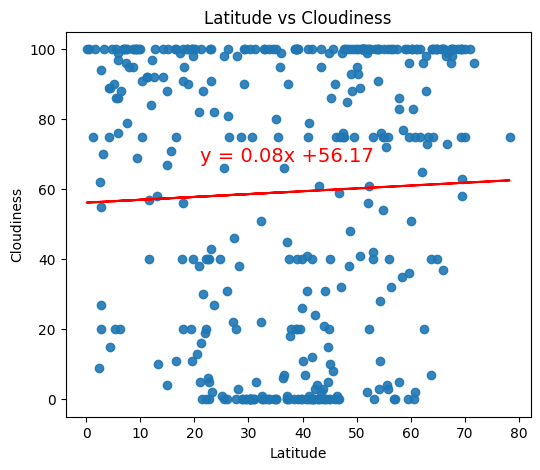

In [42]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

linear_regres_plot(x_values, y_values, "Latitude", "Cloudiness", (21,68))

plt.show()

The r^2-value is: 0.005025538920465554


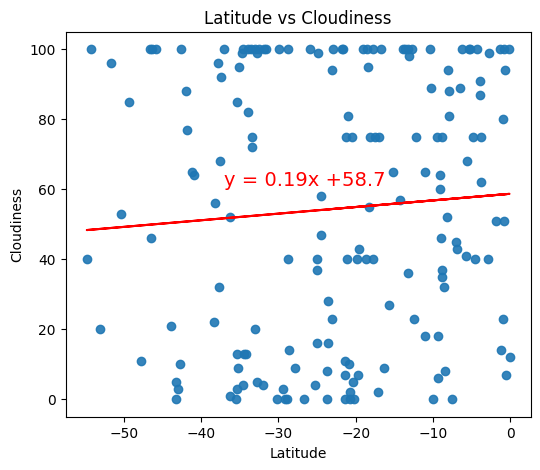

In [46]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

linear_regres_plot(x_values, y_values, "Latitude", "Cloudiness", (-37,61))

plt.show()

**Discussion about the linear relationship:** There is no relationship is between the latitude and the Cloudiness, plots above show that the cloudiness is randomely dispatched over the latitude axis.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.01826438811448159


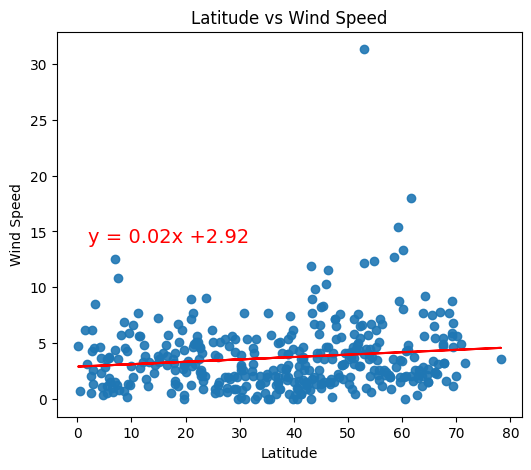

In [47]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

linear_regres_plot(x_values, y_values, "Latitude", "Wind Speed", (2,14))

plt.show()

The r^2-value is: 0.04724515404356932


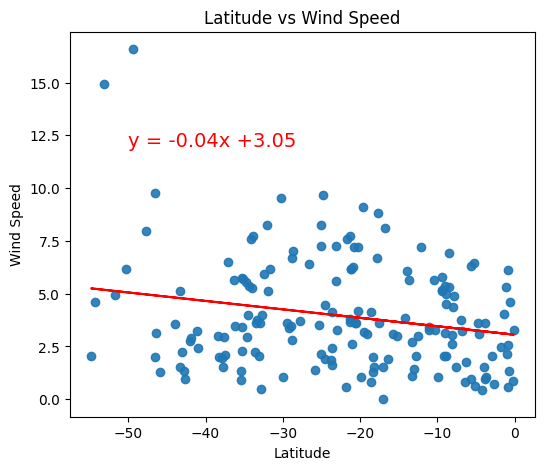

In [48]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

linear_regres_plot(x_values, y_values, "Latitude", "Wind Speed", (-50,12))

plt.show()

**Discussion about the linear relationship:** No relationship is observed between the latitude and the wind speed, as the wind speed values are almost equally proportioned over the latitude values.